<a href="https://colab.research.google.com/github/asillymind22/AI/blob/main/CNN_Money_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os

In [ ]:
danhsach = ['1000','2000','5000','10000','20000','50000','100000','200000','500000']
!ls /content/gdrive/MyDrive/AIDRIVE/Money

1000  10000  100000  2000  20000  200000  5000	50000  500000


In [ ]:
dir_train = '/content/gdrive/MyDrive/AIDRIVE/Money'

In [ ]:
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(32,32)) 
      img = img_to_array(img)
      img = img.reshape(32,32,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)


In [ ]:
create_data(dir_train, x_train, y_train)  
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 9)
print(x_train.shape)
print(y_train.shape)

(90, 32, 32, 3)
(90, 9)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 30,batch_size= 30,verbose=1)

Epoch 1/30
3/3 [==============================] - 1s 35ms/step - loss: 0.6009 - accuracy: 0.1444
Epoch 2/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3795 - accuracy: 0.1222
Epoch 3/30
3/3 [==============================] - 0s 29ms/step - loss: 0.4168 - accuracy: 0.1000
Epoch 4/30
3/3 [==============================] - 0s 31ms/step - loss: 0.4008 - accuracy: 0.1222
Epoch 5/30
3/3 [==============================] - 0s 27ms/step - loss: 0.3630 - accuracy: 0.1556
Epoch 6/30
3/3 [==============================] - 0s 31ms/step - loss: 0.3443 - accuracy: 0.2889
Epoch 7/30
3/3 [==============================] - 0s 29ms/step - loss: 0.3425 - accuracy: 0.2333
Epoch 8/30
3/3 [==============================] - 0s 29ms/step - loss: 0.3348 - accuracy: 0.2111
Epoch 9/30
3/3 [==============================] - 0s 25ms/step - loss: 0.3247 - accuracy: 0.3556
Epoch 10/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3164 - accuracy: 0.4000
Epoch 11/30
3/3 [============

In [ ]:
model.save('CNN_Money_test')

INFO:tensorflow:Assets written to: CNN_Money_test/assets


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from pathlib import Path
from PIL import Image

6

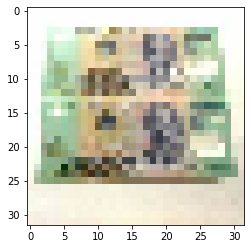

In [ ]:
img = load_img('/content/500000vnd.jpg',target_size=(32,32))
plt.imshow(img)
img = np.reshape(img,[1,32,32,3])
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))